# Finding the brain tumors detection

let's find the dataset in this link: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

# import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Loading the dataset
training = cv2.imread(r"C:\Users\asus\Desktop\Brain_Tumar\Training")

In [3]:
testing = cv2.imread(r"C:\Users\asus\Desktop\Brain_Tumar\Testing")

In [4]:
training

In [5]:
import os

# Define the path to the training directory
training_dir = r"C:\Users\asus\Desktop\Brain_Tumar\Training"

# List all files in the training directory
file_list = os.listdir(training_dir)

# Print the file names
for file in file_list:
    print(file)


.ipynb_checkpoints
Disaster Predicction Model.ipynb
glioma
meningioma
notumor
pituitary


In [6]:
# Defining the path to the testing directory 
testing_dir = r"C:\Users\asus\Desktop\Brain_Tumar\Training"
# list all files in the testing directory 
file_list = os.listdir(testing_dir)
#print the file names
for file in file_list:
    print(file)

.ipynb_checkpoints
Disaster Predicction Model.ipynb
glioma
meningioma
notumor
pituitary


In [7]:
import os

root_dir = r"C:\Users\asus\Desktop\Brain_Tumar\Training"

# Walk through all directories and files
for subdir, dirs, files in os.walk(root_dir):
    print(f"Directory: {subdir}")
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(subdir, file)
            print(f"  - {file_path}")

Directory: C:\Users\asus\Desktop\Brain_Tumar\Training
Directory: C:\Users\asus\Desktop\Brain_Tumar\Training\.ipynb_checkpoints
Directory: C:\Users\asus\Desktop\Brain_Tumar\Training\glioma
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0000.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0001.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0002.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0003.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0004.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0005.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0006.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0007.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0008.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-glTr_0009.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-gl_0010.jpg
  - C:\Users\asus\Desktop\Brain_T

In [8]:
import os

root_dir = r"C:\Users\asus\Desktop\Brain_Tumar\Testing"

# Walk through all directories and files
for subdir, dirs, files in os.walk(root_dir):
    print(f"Directory: {subdir}")
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(subdir, file)
            print(f"  - {file_path}")

Directory: C:\Users\asus\Desktop\Brain_Tumar\Testing
Directory: C:\Users\asus\Desktop\Brain_Tumar\Testing\.ipynb_checkpoints
Directory: C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0000.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0001.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0002.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0003.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0004.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0005.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0006.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0007.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0008.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-glTr_0009.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\glioma\Te-gl_0010.jpg
  - C:\Users\asus\Desktop\Brain_Tumar\Testing\g

# Data Preprocessing

In [9]:
# load the image 
img = cv2.imread(r"C:\Users\asus\Desktop\Brain_Tumar\Training\glioma\Tr-gl_0010.jpg")

In [10]:
# Resize the image
resized_image = cv2.resize(img, (224,224))

In [11]:
print(resized_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [12]:
# Convert the BGR to RGB 
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

In [13]:
from sklearn.preprocessing import LabelEncoder

labels = ['no tumor', 'tumor', 'no tumor', 'tumor']

# Initialize encoder and fit
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

print(encoded_labels)
# Output: [0 1 0 1]


[0 1 0 1]


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Create an instance with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=30,        # Rotate images randomly by 30 degrees
    width_shift_range=0.1,    # Shift width by 10%
    height_shift_range=0.1,   # Shift height by 10%
    zoom_range=0.2,           # Random zoom by 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in missing pixels after transformations
)






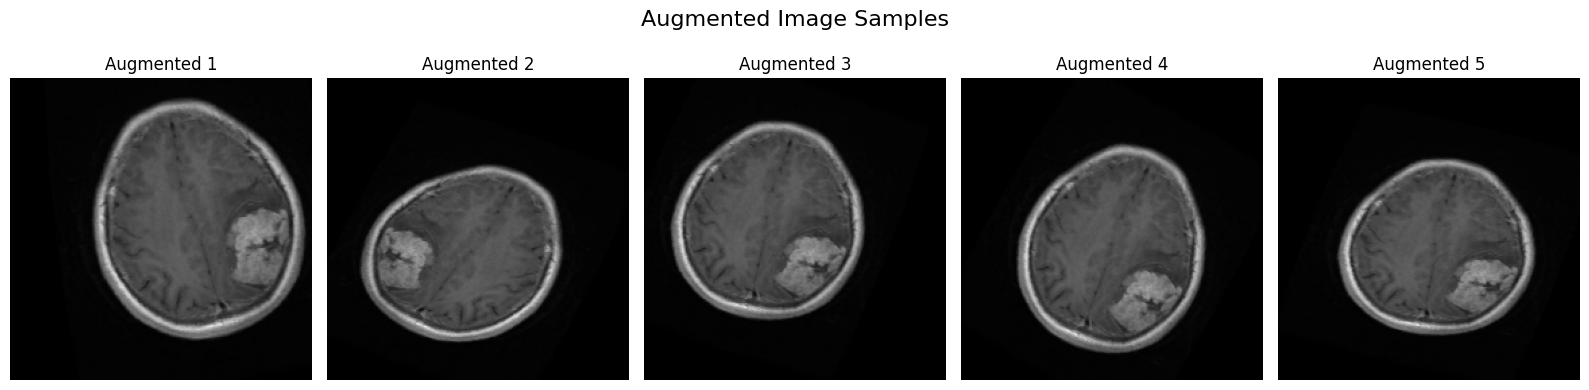

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

# Load and preprocess image
img_path = r"C:\Users\asus\Desktop\Brain_Tumar\Training\meningioma\Tr-me_0010.jpg"

try:
    img = load_img(img_path, target_size=(224, 224))
except Exception as e:
    print(f"Error loading image: {e}")
    raise

x = img_to_array(img)
x = np.expand_dims(x, axis=0)  # Shape: (1, 224, 224, 3)

# Optional: Normalize image if needed
# x = x / 255.0

# Initialize ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate and display augmented images
plt.figure(figsize=(16, 4))
plt.suptitle('Augmented Image Samples', fontsize=16)

for i, batch in enumerate(datagen.flow(x, batch_size=1, seed=42)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    plt.title(f'Augmented {i+1}')
    if i >= 4:
        break

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_3640\3903539971.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


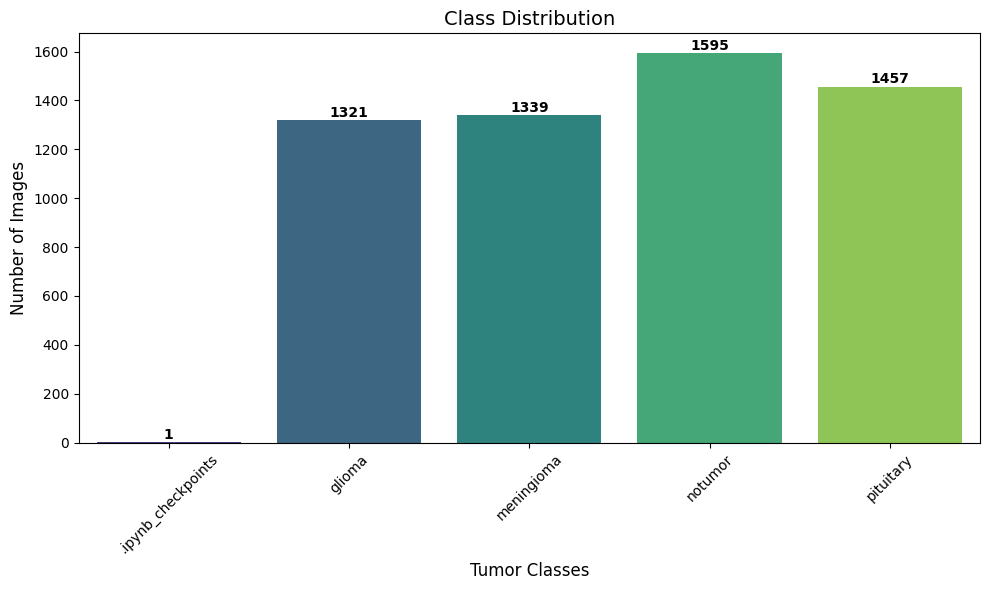

In [22]:
import seaborn as sns
# Define the dataset path
dataset_path = r"C:\Users\asus\Desktop\Brain_Tumar\Training"

# Get class names
class_names = os.listdir(dataset_path)

# Count images in each class
class_counts = {}
for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len([
            file for file in os.listdir(class_dir)
            if os.path.isfile(os.path.join(class_dir, file))
        ])

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")

# Annotate bars with values
for i, val in enumerate(class_counts.values()):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontweight='bold')

plt.title("Class Distribution", fontsize=14)
plt.ylabel("Number of Images", fontsize=12)
plt.xlabel("Tumor Classes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

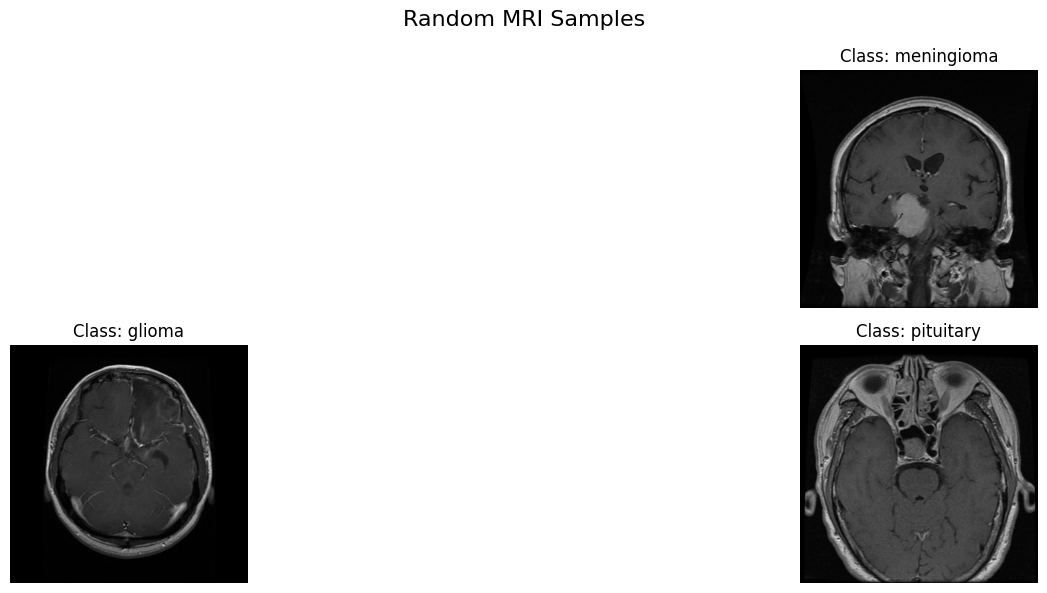

No image files found in class: .ipynb_checkpoints


In [28]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Dataset path
dataset_path = r"C:\Users\asus\Desktop\Brain_Tumar\Training"

# Allowed image extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

# Get list of class directories
class_names = [class_name for class_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, class_name))]

# 2. Display Random MRI Samples
plt.figure(figsize=(12, 6))
random.seed(42)  # Ensure reproducibility

for i in range(6):
    label = random.choice(class_names)
    class_dir = os.path.join(dataset_path, label)
    
    # Ensure the class directory contains image files
    image_files = [f for f in os.listdir(class_dir) if any(f.endswith(ext) for ext in image_extensions)]
    
    if image_files:
        img_path = random.choice(image_files)
        img_full_path = os.path.join(class_dir, img_path)
        img = Image.open(img_full_path)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')  # assuming grayscale MRI
        plt.title(f"Class: {label}")
        plt.axis('off')

plt.suptitle("Random MRI Samples", fontsize=16)
plt.tight_layout()
plt.show()

# 3. Check Image Shape, Resolution, and Color Channels
sample_class = class_names[0]  # Just pick the first class
sample_class_dir = os.path.join(dataset_path, sample_class)

# Ensure there are image files in the directory
image_files = [f for f in os.listdir(sample_class_dir) if any(f.endswith(ext) for ext in image_extensions)]

if image_files:
    sample_image_path = os.path.join(sample_class_dir, image_files[0])

    # Read image using OpenCV
    sample_img = cv2.imread(sample_image_path)

    # If grayscale image is used, OpenCV will load it as single channel (1), so add proper check
    if sample_img is None:
        print(f"Failed to load image at {sample_image_path}")
    else:
        print(f"Image shape (Height, Width, Channels): {sample_img.shape}")
        print(f"Resolution: {sample_img.shape[1]} x {sample_img.shape[0]}")
        print(f"Color Channels: {sample_img.shape[2]} ({'Grayscale' if sample_img.shape[2] == 1 else 'RGB'})")
else:
    print(f"No image files found in class: {sample_class}")


In [30]:
import os
import keras
from keras import layers
from keras.models import Sequential

# Dataset path
dataset_path = r"C:\Users\asus\Desktop\Brain_Tumar\Training"

# Get class names (unique classes in the dataset)
class_names = [class_name for class_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, class_name))]

# Define num_classes as the number of unique classes
num_classes = len(class_names)

# Initialize the model
model = Sequential()

# 1. Input Layer (use the appropriate shape based on your data)
model.add(layers.Input(shape=(224, 224, 3)))  # Example input shape for RGB images (adjust as needed)

# 2. Convolutional Layers (with pooling)
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3. Add more layers (for example, another Conv2D and MaxPooling)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 4. Flattening Layer
model.add(layers.Flatten())

# 5. Dense Layer
model.add(layers.Dense(128, activation='relu'))

# 6. Output Layer
model.add(layers.Dense(num_classes, activation='softmax'))  # num_classes defined here

# Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Display model summary to verify
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,037 (91.20 MB)

 Trainable params: 23,908,037 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset path
dataset_path = r"C:\Users\asus\Desktop\Brain_Tumar\Training"

# Get class names (unique classes in the dataset)
class_names = [class_name for class_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, class_name))]

# Define num_classes as the number of unique classes
num_classes = len(class_names)

# Load VGG16 with pretrained weights (ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))  # Adjust input shape if necessary

# Freeze the initial layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model on top of VGG16
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global pooling to reduce dimensions
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Display the model summary
model.summary()



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
from tensorflow.keras.applications import ResNet50

# Load ResNet50 with pretrained weights (ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the initial layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model on top of ResNet50
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,629 (90.98 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [34]:
from tensorflow.keras.applications import EfficientNetB0

# Load EfficientNetB0 with pretrained weights (ImageNet)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the initial layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model on top of EfficientNetB0
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 5, 5, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,214,184 (16.08 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training (with data augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# ImageDataGenerator for validation (no augmentation, only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Directory paths for training and validation data
train_dir = r"C:\Users\asus\Desktop\Brain_Tumar\Training"
# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to match the model input size
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    shuffle=True
)


Found 5712 images belonging to 5 classes.


In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping to prevent overfitting (you can adjust the patience parameter)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model checkpoint to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Fine-tune the model
history = model.fit(
    train_generator,  # Use the train_generator here
    epochs=10, 
  # Use the val_generator here
    callbacks=[early_stop, checkpoint]  # Add your callbacks to monitor training
)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 752ms/step - accuracy: 0.2579 - loss: 0.4962
Epoch 2/10


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\keras\src\callbacks\model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 745ms/step - accuracy: 0.2995 - loss: 0.4568
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 746ms/step - accuracy: 0.3670 - loss: 0.4266
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 130s 725ms/step - accuracy: 0.3892 - loss: 0.4146
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 131s 730ms/step - accuracy: 0.4046 - loss: 0.4094
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 133s 743ms/step - accuracy: 0.4241 - loss: 0.4066
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 746ms/step - accuracy: 0.4329 - loss: 0.3975
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 747ms/step - accuracy: 0.4362 - loss: 0.3960
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 129s 717ms/step - accuracy: 0.4368 - loss: 0.3953
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 131s 731ms/step - accuracy: 0.4381 - loss: 0.3934


Found 5712 images belonging to 5 classes.
179/179 ━━━━━━━━━━━━━━━━━━━━ 102s 542ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 517ms/step - accuracy: 0.4364 - loss: 0.4182 
Test Loss: 0.3880280554294586
Test Accuracy: 0.44887953996658325


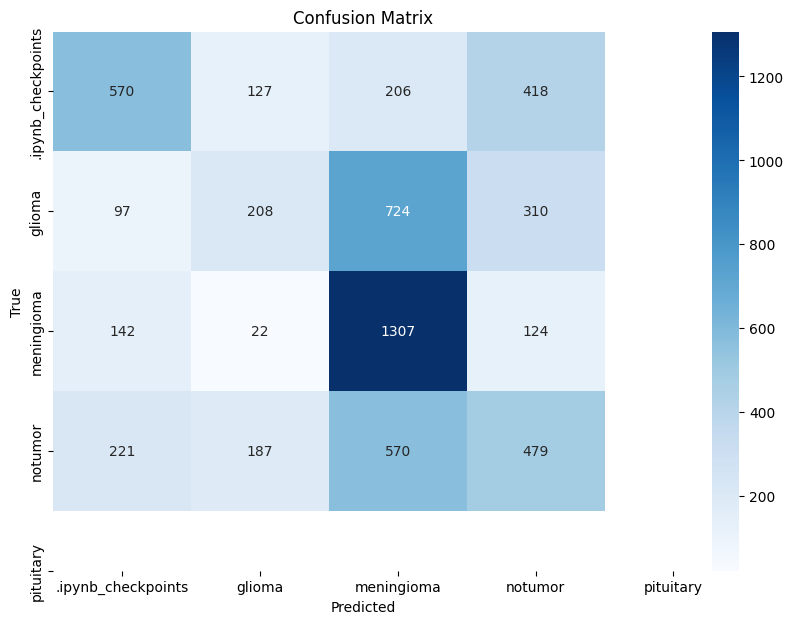

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Define the test generator (ensure you use the correct directory for test data)
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\asus\Desktop\Brain_Tumar\Training",  # Use raw string for Windows paths
    target_size=(150, 150),  # Resize images to match the input size of the model
    batch_size=32,
    class_mode='categorical',  # For multi-class classification, use 'categorical'
    shuffle=False  # Don't shuffle for evaluation
)

# Now you can use the `test_generator` in the prediction and evaluation steps
y_pred = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Get predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels from the test generator
y_true = test_generator.classes  # These are the true class labels from the generator

# Evaluate model (optional)
loss, accuracy = model.evaluate(test_generator, verbose=1)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Confusion matrix (optional but useful for multi-class classification)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [52]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Use Adam optimizer
optimizer = Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,997 (56.39 MB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

179/179 ━━━━━━━━━━━━━━━━━━━━ 621s 3s/step


C:\Users\asus\AppData\Local\Temp\ipykernel_3640\1881785794.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)
C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


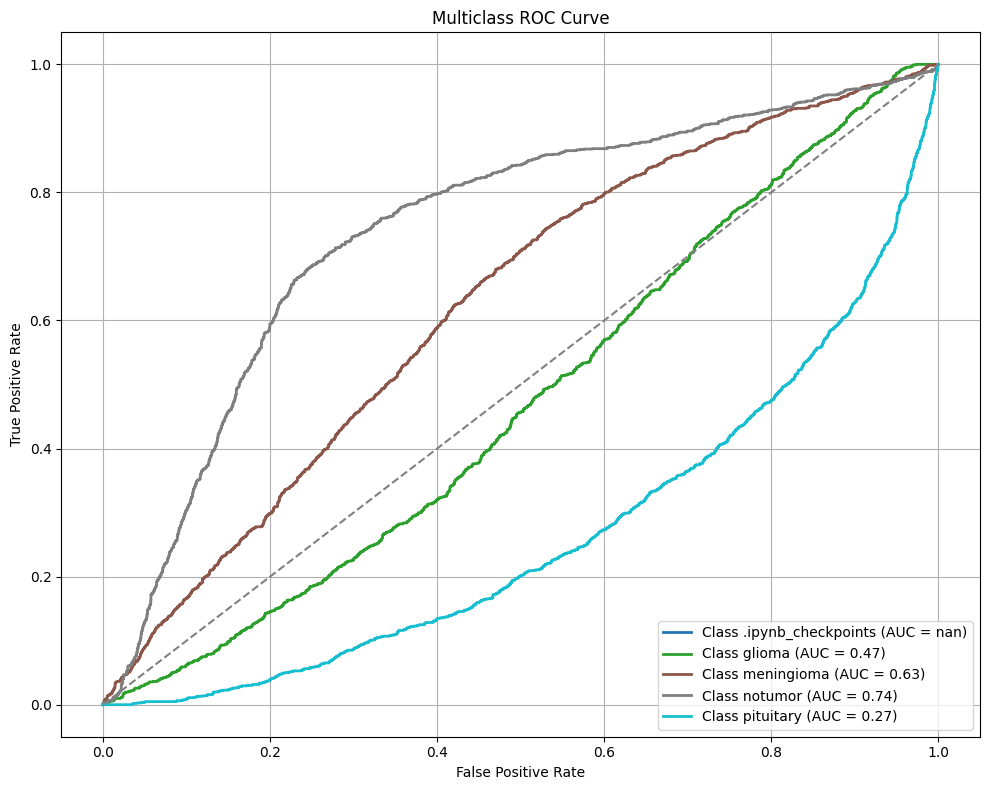

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get true labels and number of classes
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
n_classes = len(class_labels)

# One-hot encode the true labels for multiclass ROC
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))

# Predict probabilities
y_pred_prob = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, color=colors(i),
             label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Diagonal line for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and resize the image to 150x150
img = load_img(r"C:\Users\asus\Desktop\Brain_Tumar\Training\meningioma\Tr-me_0023.jpg", target_size=(150, 150))  # Make sure the image path is correct

# Convert image to array and normalize
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)

# Optional: if your model uses softmax
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class index: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
Predicted class index: [0]


In [63]:
# Save the trained model
model.save('brain_tumor_model.h5')
